#Review These
Overview on Decision Trees: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

More on Encoding: https://pbpython.com/categorical-encoding.html

In [1]:
from sklearn import tree
#import pandas
import pandas as pd
#import numpy
import numpy as np


In [2]:
# Run this cell to download the dataset
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip"
!unzip "/content/ObesityDataSet_raw_and_data_sinthetic (2).zip" 

--2022-08-22 17:01:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119205 (116K) [application/x-httpd-php]
Saving to: ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’

ObesityDataSet_raw_ 100%[===================>] 116.41K   301KB/s    in 0.4s    

2022-08-22 17:01:23 (301 KB/s) - ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’ saved [119205/119205]

Archive:  /content/ObesityDataSet_raw_and_data_sinthetic (2).zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.arff  
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


In [3]:
#import dataset as a pandas dataframe - name it df - using the .read_csv method
dataset = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(dataset)

In [4]:
#view first 5 rows of the dataset using the .head() method
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#check for the total amount of null values in each column using the .isnull() method
df.isnull().count()

Gender                            2111
Age                               2111
Height                            2111
Weight                            2111
family_history_with_overweight    2111
FAVC                              2111
FCVC                              2111
NCP                               2111
CAEC                              2111
SMOKE                             2111
CH2O                              2111
SCC                               2111
FAF                               2111
TUE                               2111
CALC                              2111
MTRANS                            2111
NObeyesdad                        2111
dtype: int64

Number of Columns

In [6]:
df.shape[1]

17

Are there any new features that could be derived from our old features?


In [7]:
#create a function that takes your df as an input then calculates the BMI using the equation: BMI= Weight/ Height**2
def calculateBMI(df):
    BMI = df['Weight'] / (df['Height']*df['Height'])
    return BMI

In [8]:
# apply the function to every row in the dataframe, create a new column, 'BMI' that contains those values. HINT: You can use .apply and lambda
df['BMI'] = df.apply(lambda x:calculateBMI(x), axis=1)

In [9]:
#check your dataframe
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


Drop old features, i.e: height and weight

In [10]:
#use .drop() method to your dataframe, don't forget to set inplace=True
df.drop(['Weight', 'Height'], axis=1, inplace=True)

In [11]:
#check your dataframe
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [12]:
#check your columns' data types using the .dtypes method

Check the unique values in your target label

In [13]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Create two Dataframes of Features X and Output Y

In [14]:
X =  df.drop(['NObeyesdad'], axis=1)

In [15]:
y = df[['NObeyesdad']]


Change column name to something that makes sense

In [16]:
#replace newcolumname
y.rename(columns= {'NObeyesdad': 'weight_type '}, inplace= True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Encode your Catgorical Features

In [17]:
X_encoded = pd.get_dummies(X)


In [ ]:
X_encoded.columns


Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

*Perform* label encoding to y

In [ ]:
# run this cell to check your label column - y
y.columns


Index(['NObeyesdad'], dtype='object')

In [ ]:
# import preprocessing module from sklearn
from sklearn import preprocessing
#initialize label encoder
label_encoder = preprocessing.LabelEncoder()
# fit the data to your initialized label encoder
y['NObeyesdad']= label_encoder.fit_transform((y['NObeyesdad']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#check unique values for y
y['NObeyesdad'].unique()

array([1, 5, 6, 2, 0, 3, 4])

Optional: Normalize so that no feature has more weight over the other, you can use MinMaxScaler

In [ ]:
#import scaler - you can use MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = None
# Create a list of your numerical features
numerical = None

X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

# Show an example of a record with scaling applied
display(X_encoded.head(n = 1))

Shuffle and split the data using train_test_split

In [ ]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, y)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1583 samples.
Testing set has 528 samples.


# Training, Prediction and Evaluation.
Choose a classifier: you can use logistic regression, NaiveBayes, SVM, KNN, Decision Trees, Random Forrest. 

In [ ]:
# Let's use Decision Tree Classifier
# import SVM Classifier from Sklearn
from sklearn import svm
from sklearn import tree
# initilize the classifier
#classifier = svm.SVC(kernel = 'linear')
classifier = tree.DecisionTreeClassifier(random_state=0)
# fit your classifier to the data using the .fit() method
classifier.fit(X_train, Y_train)
# predict train set values
y_pred_train = classifier.predict(X_train) 
# predict test set values
y_pred_test = classifier.predict(X_test) 

Import our evaluation metric

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# check accuracy on training set
print("Accuracy:", accuracy_score(Y_train, y_pred_train))
# check accuracy on testing set
print("Accuracy:", accuracy_score(Y_test, y_pred_test))

Accuracy: 1.0
Accuracy: 0.9602272727272727


[Text(0.69875, 0.95, 'X[6] <= 34.374\ngini = 0.856\nsamples = 1583\nvalue = [202, 215, 253, 228, 250, 215, 220]'),
 Text(0.4875, 0.85, 'X[6] <= 29.963\ngini = 0.799\nsamples = 1101\nvalue = [202, 215, 248, 1, 0, 215, 220]'),
 Text(0.275, 0.75, 'X[6] <= 24.916\ngini = 0.75\nsamples = 850\nvalue = [202, 215, 0, 0, 0, 215, 218]'),
 Text(0.105, 0.65, 'X[6] <= 18.484\ngini = 0.513\nsamples = 423\nvalue = [202, 215, 0, 0, 0, 6, 0]'),
 Text(0.085, 0.55, 'gini = 0.0\nsamples = 198\nvalue = [198, 0, 0, 0, 0, 0, 0]'),
 Text(0.125, 0.55, 'X[6] <= 18.578\ngini = 0.086\nsamples = 225\nvalue = [4, 215, 0, 0, 0, 6, 0]'),
 Text(0.04, 0.45, 'X[1] <= 2.284\ngini = 0.469\nsamples = 8\nvalue = [3, 5, 0, 0, 0, 0, 0]'),
 Text(0.02, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0, 0, 0]'),
 Text(0.06, 0.35, 'X[20] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0, 0, 0, 0]'),
 Text(0.04, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0, 0]'),
 Text(0.08, 0.25, 'gini = 0.0\nsamples = 1\nv

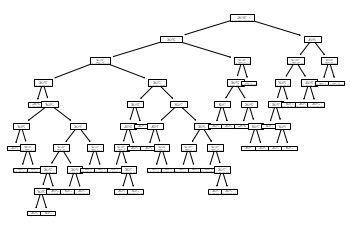

In [ ]:
# visualize your tree
from sklearn import tree
tree.plot_tree(classifier)

In [ ]:
# check the hyperparameters used
classifier.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# check your tree's depth
classifier.get_depth()

9

**Awesome progress if you've come this far! **

Extra credit - Why don't we play with the hyperparameters we discussed earlier to see how our model changes?

check the documentation and choose the hyperparameters you like: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
# initialize your classifier again but this time with the hyperparamers you want

In [ ]:
## fit your classifier to the data using the .fit() method
# predict train set values
# predict test set values

In [ ]:
# check accuracy on training set
# check accuracy on testing set

In [ ]:
# visualize your tree
 tree.plot_tree(classifier)

# Reflect on your results